# Dodger Stadium Attendance

### In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. 

### Use this data to make a recommendation to management on how to improve attendance. 

### Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. 

### This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

In [1]:
# Import Functions
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set your custom color palette

colors = ["#FF0B04", "#4374B3"]
cust_colors = sns.set_palette(sns.color_palette(colors))
red = "#FF0B04"
blue = "#4374B3"
combined = "#782F98"

## Baseball Is America's Pastime.

### The first professional baseball game was played in 1869.  Back then, there were no gloves, standardized balls, or catcher masks, and you played at your own risk.  Baseball has come a long way with fancy modern stadiums, safety gear, and crowds of over 50,000.  

### In 2022, each of the 30 teams played 182 games, with 81 games at home.  There are plenty of games for fans to attend, but with so many games, there are many with a sizeable percentage of empty seats.  

### Some reasons for empty seats cannot be controlled, such as who the opponent is, when the game is played or the weather.  Dodgers Stadium is an open-air stadium without a roof, so weather plays a part in attendance, but some things can be done to improve attendance.  

### We will explore the Los Angeles Dodgers 2022 attendance data to see what can be done to draw more people to the games.

### Note - I've been going to Houston Astros games since I was little with my Grandfather.  Before the pandemic and starting this program, I went to at least 6 games a season.  I also watch the games on TV.  My recommendations will include first hand observations.

In [3]:
# Create data frames for all records
mlb_df = pd.read_csv('dodgers-2022.csv')

print('1st 10 Rows of MLB Dataset')
mlb_df.head(10)

1st 10 Rows of MLB Dataset


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


## 1.  Review The Dataset

 - Describe the dataset by identifying the columns and their types
 - Check for missing information and fill in the blanks, if necessary
 - Create additional promotions game and month/day columns
 - Summarize the MLB information

In [4]:
# Describe the MLB dataset

print('Number of Rows and Columns ', mlb_df.shape)

print('MLB Column Information')
print(mlb_df.dtypes)

Number of Rows and Columns  (81, 12)
MLB Column Information
month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object


In [5]:
# Check for missing information

print('Check For Missing Information')
mlb_df.isnull().sum()

Check For Missing Information


month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [6]:
# Add Promotions Game and combined date columns

mlb_df['promo_game'] = 'NO'
mlb_df.loc[(mlb_df['cap'] == 'YES') | (mlb_df['shirt'] == 'YES') 
           | (mlb_df['fireworks'] == 'YES')
           | (mlb_df['bobblehead'] == 'YES'), 'promo_game'] = 'YES' 

mlb_df['month_day'] = mlb_df['month'] + ' ' + mlb_df['day'].astype(str)

print('1st 10 Rows with Additional Columns')
mlb_df.head(10)

1st 10 Rows with Additional Columns


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,promo_game,month_day
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,NO,APR 10
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,NO,APR 11
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,NO,APR 12
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,YES,APR 13
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,NO,APR 14
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,NO,APR 15
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,NO,APR 23
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO,NO,APR 24
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,NO,APR 25
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO,YES,APR 27


In [7]:
# Display Summary Information.

print('Summary Information')
mlb_df.describe()

Summary Information


,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


## 2. Visualize the Dodger Stadium Attendance Information

 - Display the average attendance for each opponent and review the most and least attended games.  
 - Display the average attendance by each month looking at the number of games and when there is the best attendance
 - Graphically display the average attendance for the day of the week as well as the number of games played on those days durin the season
 - Examine the average attendance for games with and without promotions
    - Games with and without promotions as well as the total number of games in each category
    - Games by month having promotions or not and counting the number of games per month
    - Games by day of the week with and without promotions and counting the promotions on each day

### Display Team Attendance Information.

In [8]:
# Sort the MLB information by attendance

sorted_mlb = mlb_df.sort_values('attend',ascending = False)

print('Top 10 MLB Attended Games')
display(sorted_mlb[['month_day', 'opponent', 'attend','day_of_week', 
                  'day_night', 'promo_game']].head(10))
print('\nBottom 10 MLB Attended Games')
display(sorted_mlb[['month_day', 'opponent', 'attend','day_of_week', 
                  'day_night', 'promo_game']].tail(10))

Top 10 MLB Attended Games


,month_day,opponent,attend,day_of_week,day_night,promo_game
0,APR 10,Pirates,56000,Tuesday,Day,NO
59,AUG 21,Giants,56000,Tuesday,Night,YES
39,JUL 1,Mets,55359,Sunday,Night,YES
31,JUN 12,Angels,55279,Tuesday,Night,YES
56,AUG 7,Rockies,55024,Tuesday,Night,YES
64,AUG 30,Snakes,54621,Thursday,Night,YES
10,APR 28,Nationals,54242,Saturday,Night,YES
44,JUL 14,Padres,54014,Saturday,Night,YES
42,JUL 4,Reds,53570,Wednesday,Night,YES
35,JUN 17,White Sox,53504,Sunday,Day,NO



Bottom 10 MLB Attended Games


,month_day,opponent,attend,day_of_week,day_night,promo_game
46,JUL 16,Phillies,32238,Monday,Night,NO
67,SEP 2,Snakes,31607,Sunday,Day,NO
3,APR 13,Padres,31601,Friday,Night,YES
1,APR 11,Pirates,29729,Wednesday,Night,NO
2,APR 12,Pirates,28328,Thursday,Night,NO
29,MAY 31,Brewers,26773,Thursday,Night,NO
6,APR 23,Braves,26376,Monday,Night,NO
8,APR 25,Braves,26345,Wednesday,Night,NO
28,MAY 30,Brewers,25509,Wednesday,Night,NO
18,MAY 14,Snakes,24312,Monday,Night,NO


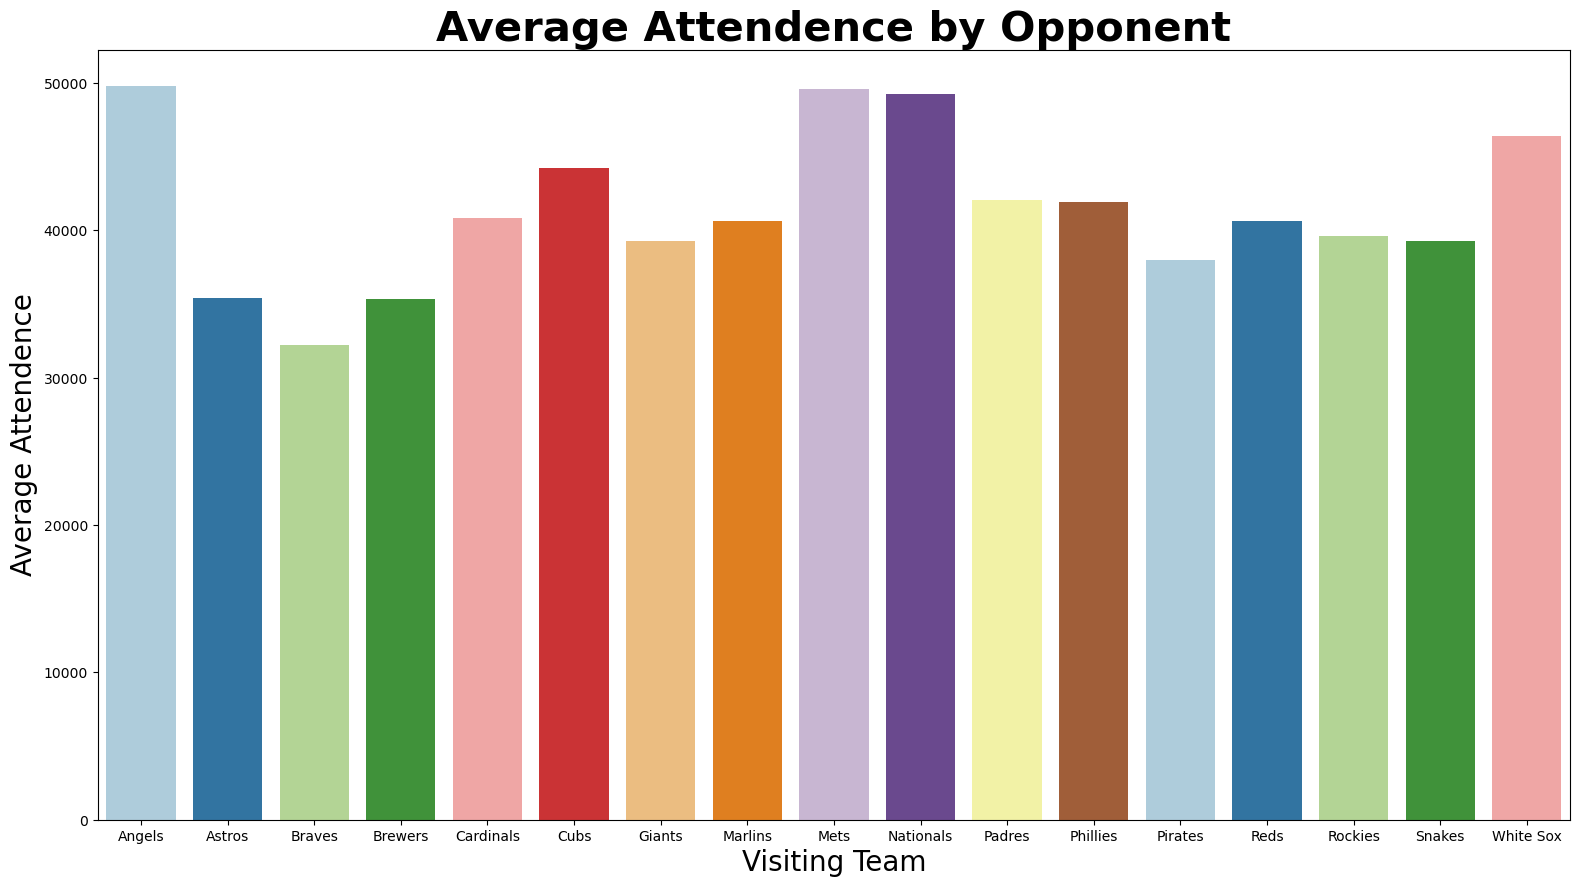

In [9]:
# Average Attendance by Team

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'opponent', y = 'attend', data = mlb_df.sort_values('opponent'), 
                      estimator = np.mean, ci = None, palette = 'Paired')  

team_bp.set_title('Average Attendence by Opponent', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Visiting Team', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

The opponents with the highest average of attended games are cross-town rivals, the Los Angeles Angels, National League opponents, the New York Mets and Washington Nationals.  Eight of the ten games with the highest attendance and all ten of the lowest attended games are in the National League.  There were 2 sellout games: Pirates and Giants.  These results are not surprising since, in 2022, only 16 of 162 regular season games were against the American League.  Finally eight of the ten most attended games were promotion games.

### Display Average Attendance by Month

In [10]:
# Count the number of games per month

games_per_month = mlb_df.groupby(['month']).size()

print('Number of Games per Month')
display(games_per_month)

Number of Games per Month


month
APR    12
AUG    15
JUL    12
JUN     9
MAY    18
OCT     3
SEP    12
dtype: int64

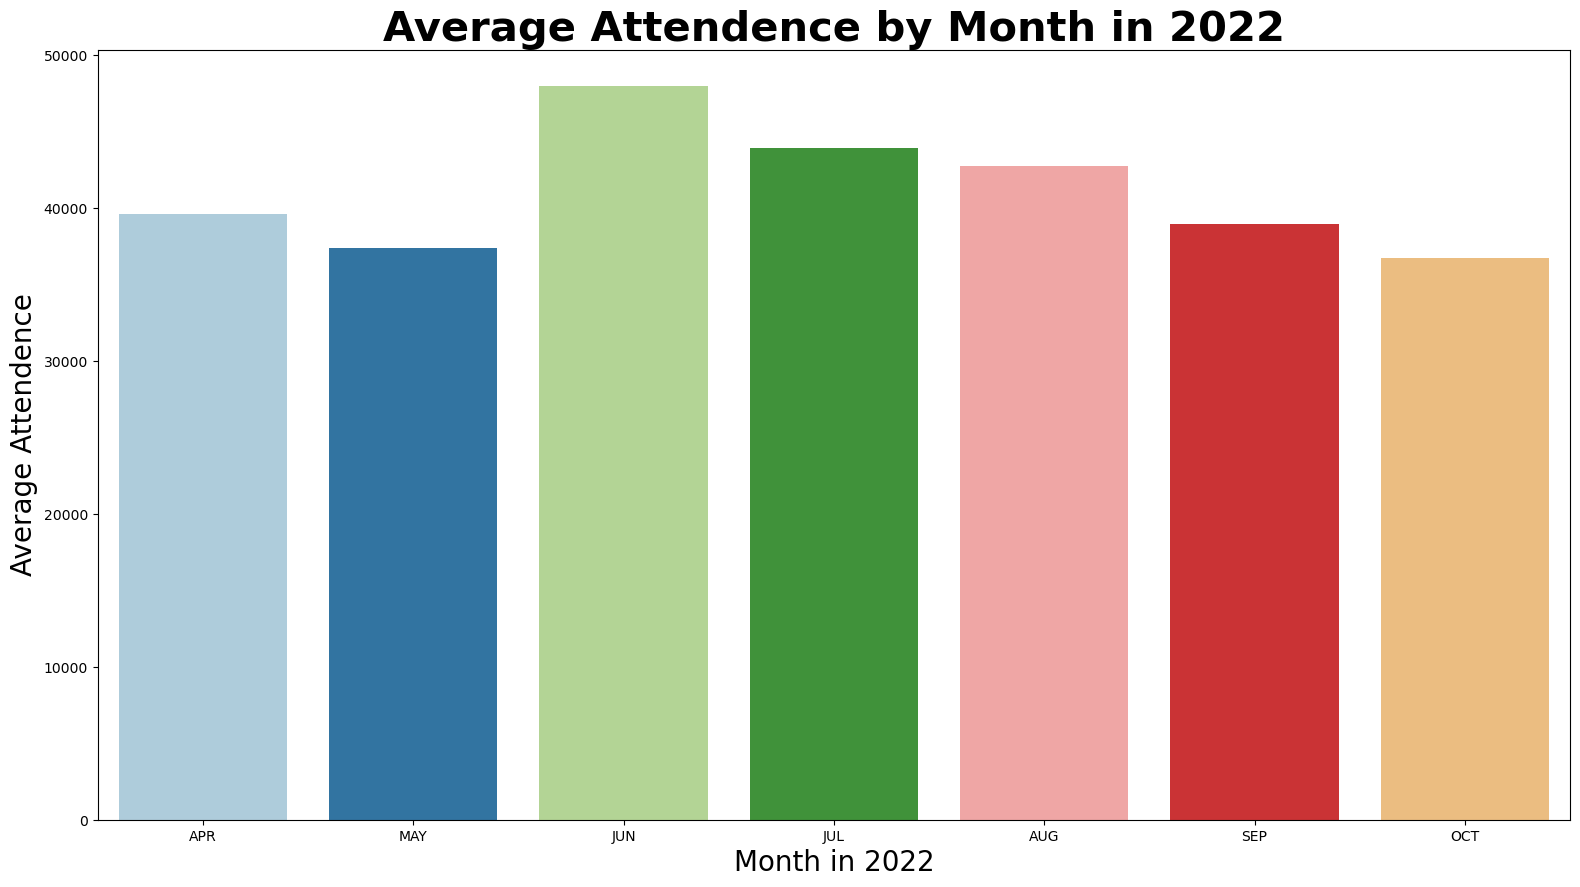

In [11]:
# Average Attendance by month

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'month', y = 'attend', data = mlb_df, 
                      estimator = np.mean, ci = None, palette = 'Paired')  

team_bp.set_title('Average Attendence by Month in 2022', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Month in 2022', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

The capacity of Dodger Stadium is 56,000.  The month of June is close with around 49,000, but with only nine games played.  June and July have the best attendance when school is out for the summer.  Attendance starts dropping in August when school is back in session.  The season ends in early October, so only three games were played.   

### Display Average Attendance by Day of the Week

In [12]:
# Count the number of Day of the Week games

games_per_dow = mlb_df.groupby(['day_of_week']).size()

print('Number of Games per Day of the Week')
display(games_per_dow)

Number of Games per Day of the Week


day_of_week
Friday       13
Monday       12
Saturday     13
Sunday       13
Thursday      5
Tuesday      13
Wednesday    12
dtype: int64

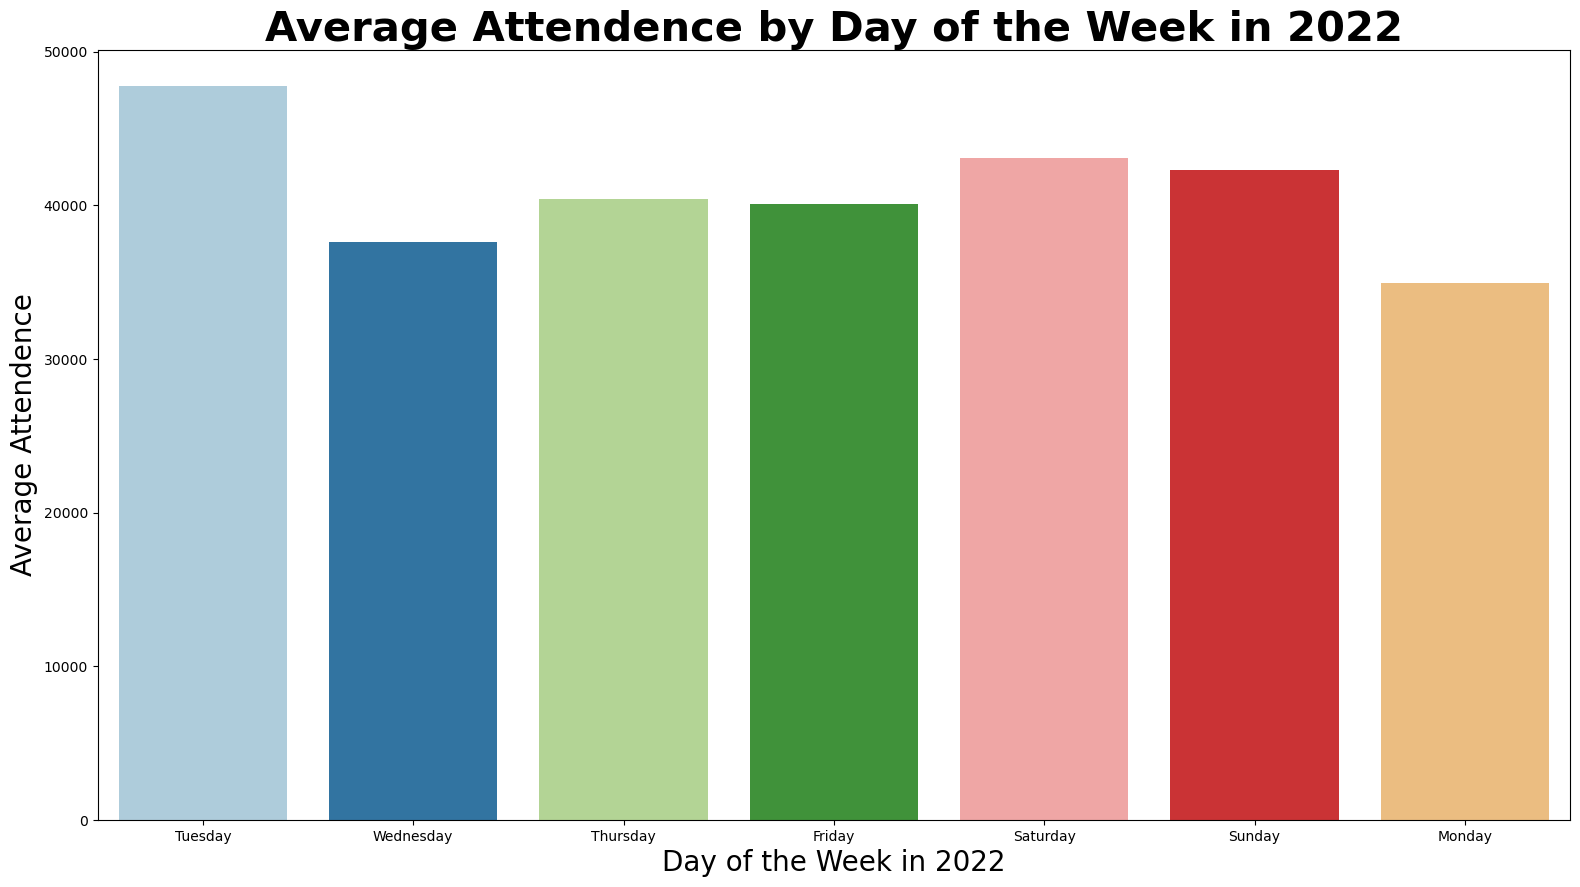

In [13]:
# Average Attendance by Day of the Week

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'day_of_week', y = 'attend', data = mlb_df, 
                      estimator = np.mean, ci = None, palette = 'Paired')  

team_bp.set_title('Average Attendence by Day of the Week in 2022', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Day of the Week in 2022', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

During the season, games are played primarily 6 days a week with Thursday being an off day.  Tuesday is the day with best attendance and Monday is the worst.  That Tuesday has the best attendance is surprising since more people are off of work on the weekends.

### Compare Average Attendance With and Without Promotions

It does not matter what the is so I'm combining the promotions into 1 column.  

In [14]:
# Count the number of games with and without promotions

promo_games = mlb_df.groupby(['promo_game']).size()

print('Number of Games With and Without Promotions')
display(promo_games)

Number of Games With and Without Promotions


promo_game
NO     51
YES    30
dtype: int64

In [15]:
# Count the number of games with and without promotions per month

m_promo_games = mlb_df.groupby(['month','promo_game']).size()

print('Number of Games With and Without Promotions')
display(m_promo_games)

Number of Games With and Without Promotions


month  promo_game
APR    NO             8
       YES            4
AUG    NO             8
       YES            7
JUL    NO             6
       YES            6
JUN    NO             4
       YES            5
MAY    NO            13
       YES            5
OCT    NO             3
SEP    NO             9
       YES            3
dtype: int64

In [16]:
# Count the number of games with and without promotions per day of week

dow_promo_games = mlb_df.groupby(['day_of_week','promo_game']).size()

print('Number of Games With and Without Promotions')
display(dow_promo_games)

Number of Games With and Without Promotions


day_of_week  promo_game
Friday       YES           13
Monday       NO            11
             YES            1
Saturday     NO            11
             YES            2
Sunday       NO            10
             YES            3
Thursday     NO             3
             YES            2
Tuesday      NO             5
             YES            8
Wednesday    NO            11
             YES            1
dtype: int64

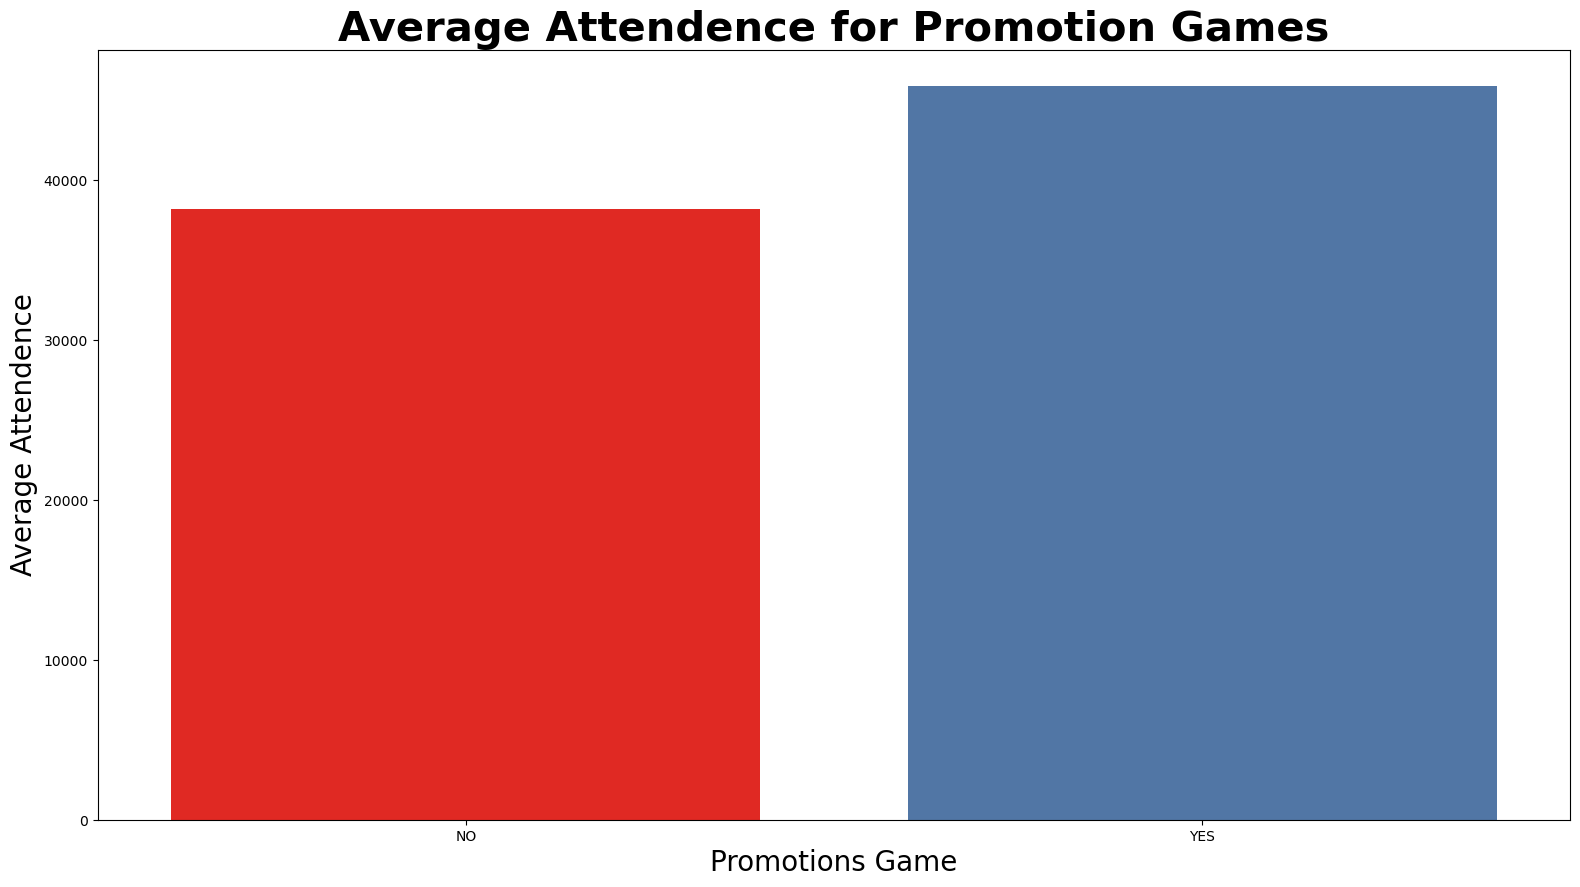

In [17]:
# Average Attendance for Promotion Games

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'promo_game', y = 'attend', data = mlb_df, 
                      estimator = np.mean, ci = None, palette = cust_colors)  

team_bp.set_title('Average Attendence for Promotion Games', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Promotions Game', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

While there are more games without promotions (51/30), the average attendance for games associated with promotions is greater.  Eight of the ten most attended games were promotion games.

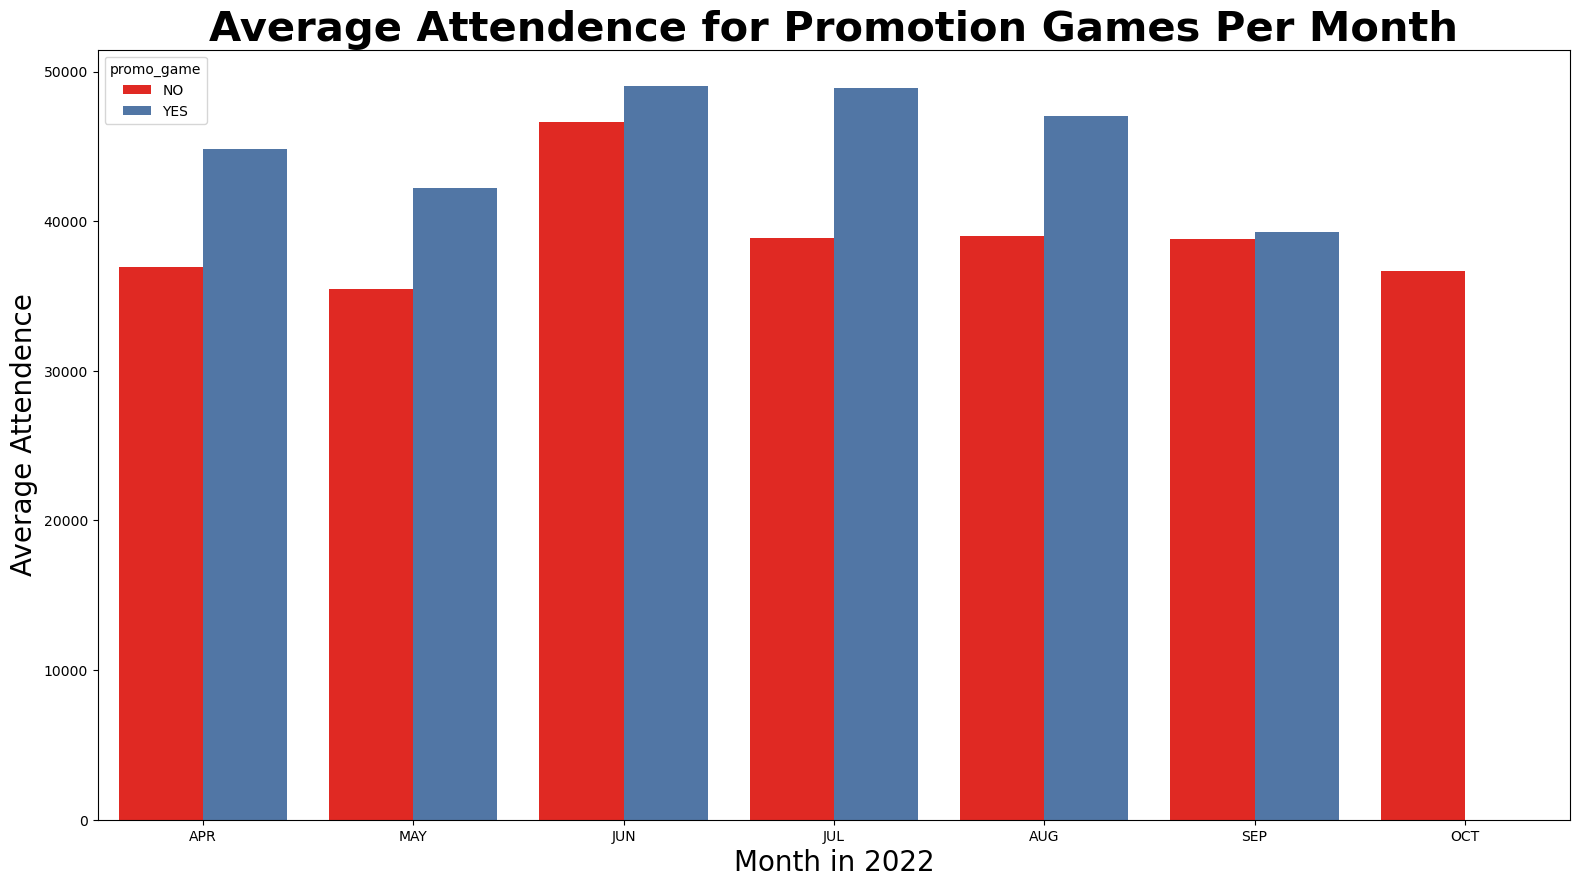

In [18]:
# Average Attendance for Promotion Games by month

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'month', y = 'attend', data = mlb_df, 
                      estimator = np.mean, ci = None, hue = 'promo_game') 

team_bp.set_title('Average Attendence for Promotion Games Per Month', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Month in 2022', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

On average, more people attend games when there are promotions.  In July, there were six games with promotions and six without promotions, and the attendance was higher with promotions.  Finally, October had no promotional games.  The attendance number does not consider games by opponents favored by Dodger fans.  

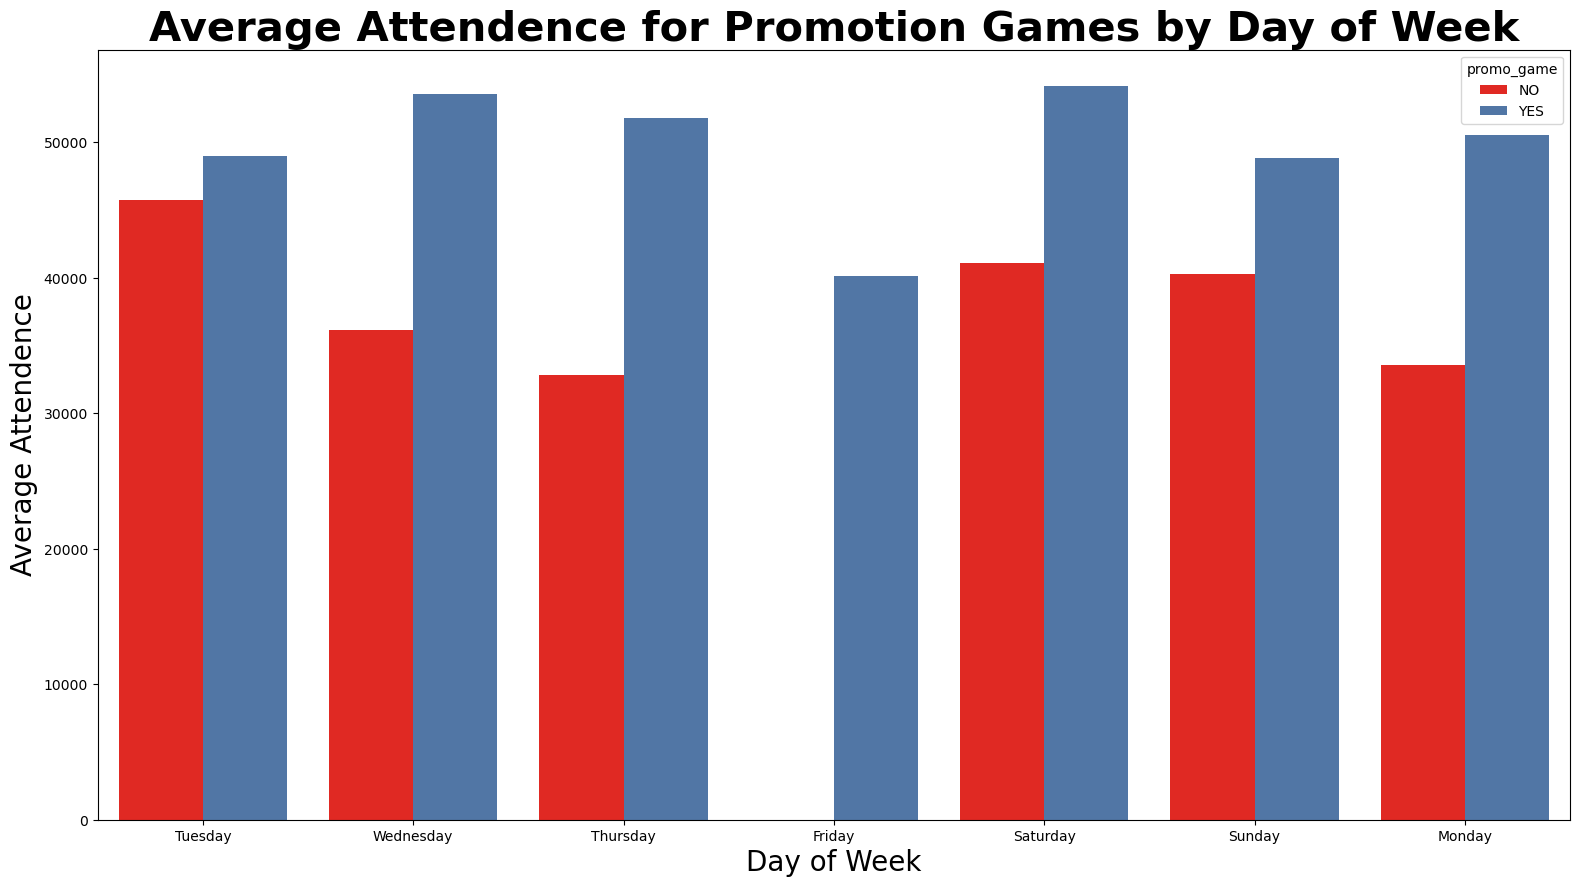

In [19]:
# Average Attendance for Promotion Games by day o week

fig, axes = plt.subplots(figsize = (19, 10))

team_bp = sns.barplot(x = 'day_of_week', y = 'attend', data = mlb_df, 
                      estimator = np.mean, ci = None, hue = 'promo_game') 

team_bp.set_title('Average Attendence for Promotion Games by Day of Week', 
                      fontdict={'size': 30, 'weight': 'bold', 'color': 'black'})
team_bp.set_xlabel('Day of Week', fontdict={'size': 20})
team_bp.set_ylabel('Average Attendence', fontdict={'size': 20})

# Show the plot
plt.show()

### Commentary

No matter which day of the week promotion games increase attendance.  Friday's always have promotional games with Friday Night Fireworks.  According to the Dodgers website, Tuesdays have Taco Tuesdays which could account for the higher attendance.

## 3.  How the Variables Relate to Each Other - Deep Dive into the Data

 - Look at the relationship between numeric (non-catigorical) variables.

 - Look into the relationship between promotions and attendance and compare to the visualizations.

### Create a correlation matrix to compare the numeric variables

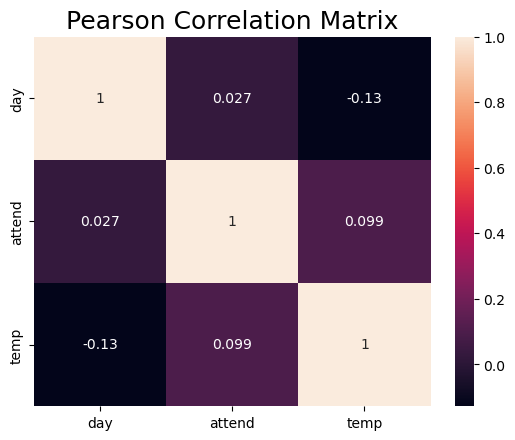

In [20]:
# Use the heatmap to see the correlation between the numeric variables

# Make a copy of the MLB df
mlb_df1 = mlb_df.copy()

corr_matrix = mlb_df1.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot = True)
plt.title('Pearson Correlation Matrix', size=18)

plt.show()

### Commentary

Attendance and temperature are postively correlated and as the season goes on the the increase in temperature would results in increase in attendance. Since Dodger Stadium is outdoors, better weather leads to better attendance.  When games are played is decided by Major League Baseball, but when school is not in session, attendance does increase.  While both weather and schedule contribute to game attendance, neither can be used to increase attendance because they are not controlled by the Dodgers.

### Evaluate the linear relationship between two continuous variables

Removing columns beyond the teams control to focus on promotions and attendance, but keeping the month.  Then using Pearson Correllation to see the relationship between these columns and attendance to confirm the information seen in the bar graphs above.

In [21]:
# Start with fresh data and remove weather, opponents, and day of month information
# Create dummy variables

# Make a copy of the MLB df
mlb_df2 = mlb_df[['month', 'attend', 'day_of_week', 'cap', 'shirt', 'fireworks', 
                  'bobblehead', 'promo_game']]

# Identify the category columns
cat_columns = ['month', 'day_of_week', 'cap', 'shirt', 'fireworks', 'bobblehead', 
               'promo_game']

# Create Dummy variables
mlb_dummy_df = pd.get_dummies(mlb_df2, columns = cat_columns)
mlb_dummy_df.head(10)

,attend,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,...,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES,promo_game_NO,promo_game_YES
0,56000,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,29729,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,28328,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,31601,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1
4,46549,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,38359,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
6,26376,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
7,44014,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
8,26345,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
9,44807,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1


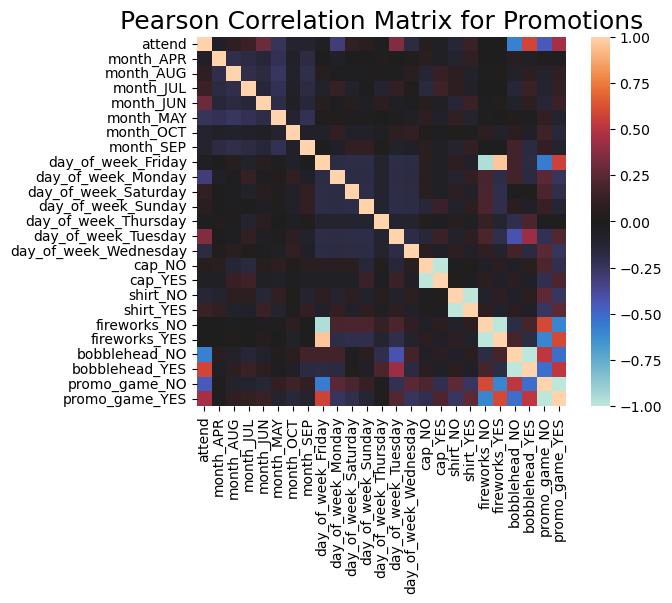

In [22]:
# Plot the heatmap again looking at all the variables using Pearson Correlation
dummy_matrix = mlb_dummy_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(dummy_matrix, center = 0, vmin = -1, vmax = 1, square = True)
plt.title('Pearson Correlation Matrix for Promotions', fontsize=18)

plt.show()

### Commentary

This visualization is very busy and very little useful information can be gathered from this.

### Correlate attendance with month, day of week, and promotions.

In [23]:
## Correlate the Dummy variable with attendance
## Continuing with Pearson correlation

print('Pearson Correlation, Comparing Selected Features to ')
dummy_corrs = dummy_matrix.corr().stack().reset_index().sort_values(0, ascending=False)
dummy_corrs.loc[dummy_corrs['level_0'] == 'attend'].sort_values(0, ascending=False)

Pearson Correlation, Comparing Selected Features to 


,level_0,level_1,0
0,attend,attend,1.000000
22,attend,bobblehead_YES,0.856648
24,attend,promo_game_YES,0.676402
13,attend,day_of_week_Tuesday,0.653025
4,attend,month_JUN,0.478385
3,attend,month_JUL,0.281999
18,attend,shirt_YES,0.241409
2,attend,month_AUG,0.189371
12,attend,day_of_week_Thursday,0.108265
20,attend,fireworks_YES,0.086190


### Commentary

The results reinforce the bar graphs above.  The summer months and promotional games have a positive correlation and better  attendance.  The months where the children are back in school have a negative correlation and lower attendence.  The attendence by day of week does reflect what is seen in the bar graph.  Tuesday has the greatest correlation between the days of the week and attendance.  Mondays and Wednesdays are negatively correlated as expected and the weekend while positively correlated falls in the middle.  Thursday is an outlier because it is primarily an off day.

## Recommendations

### To increase attendance at Dodger Stadium, Dodger management should consider these recommendations that are within management's control.  Opponents and scheduling decisions are not controlled by individual teams so what is recommended will need to work in conjunction with current season structure.

 - The opposing teams with the highest average attendance are the Newe York Met, the Washington Nationals, and cross-twon rivals the Los Angeles Angels.  Except for the Angels and teams in the division, you cannot know which teams you will play at home.
 - June, July, and August have the greatest average attendance because the children are out of school and people are on vacation.  
 - The data only lists shirts, caps, bobbleheads, and fireworks as promotions, but there are more promotional nights (Hello Kitty Night, Star Wars Night) not listed in this spreadsheet.  Also a wider variety of give aways like team baseball replicas and drawstring bags would add to repeat attendance.
 - The Dodgers have one of the largest stadiums with a capacity of 56,000.  There were 2 sellout games in 2022, but there also games that had less than half of the seats filled.  Many teams, including the Houston Astros, have Flash Sales the week before a game to sell the empty seats at a discount.  
 - The basic Dodger Dog is \\$6.99, a souvenir fountain soda is \\$9.99, and Smartwater is \$6.99.  It is expensive to eat at a game.  Dollor dog nights are very popular and fill the stadium.  Money saved on hot dogs can be spent on something else.
 - A family of 4 pays \\$219 to attend a Dodgers game, the most expensive in the MLB.  Many teams have Family 4 packs, consisting of 4 tickets, 4 hot dogs, and 4 sodas at a discounted price.  Some 4 packs are as low as \\$89.  This would be an enticement to attend games during the summer months and the weekends when school is back in session.
 - Nothing improves attendance more than having a team with a winning record.

### Baseball is generational.  A father tells his son about how his father took him to his first baseball game.  Baseball is about memories, that create fans that attend games.  While the weather and scheduling are not controlled by the team, there are areas that can be used to improve attendance.

## References

[The Capacities of All MLB Stadiums](https://thesporting.blog/blog/capacities-of-mlb-stadiums)

[The 1st Major League Baseball Game](https://www.mlb.com/cut4/the-cincinnati-red-stockings-played-the-first-professional-baseball-game-146-years-ago/c-122238048)

[Dodger Promotions 2022](https://sportscity.com/dodgers-promotions-2022-taco-tuesday-ticket-packages-theme-nights-at-dodger-stadium/)

[Cost of Taking Your Family Out to the Ball Game in 2023](https://www.moneygeek.com/living/analysis/cost-for-family-to-attend-an-mlb-game/)

[Dodger Stadium Food and Drink Guide](https://www.californiabychoice.com/home/2022-dodger-stadium-food-and-drink-guide)